In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
results = pd.read_csv('results/results.csv')
results = pd.read_csv('results/similarities.csv')
sentiments = pd.read_csv('results/sentiment.csv')

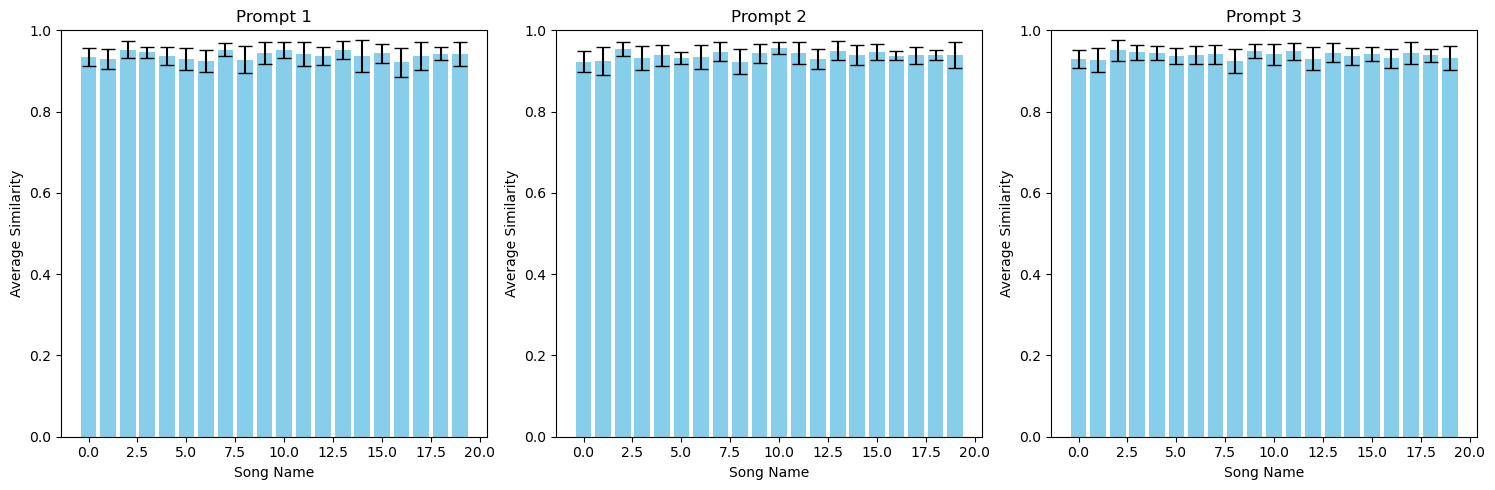

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Compute and plot average similarity for each song, for each prompt
for prompt_id in range(1, 4):
    results_id = results[results['prompt_id'] == prompt_id]
    
    avg_similarities = []
    std_similarities = []
    song_names = results_id['song_name'].unique()
    
    for song_name in song_names:
        results_id_song = results_id[results_id['song_name'] == song_name]
        avg_similarities.append(np.mean(results_id_song['similarities']))
        std_similarities.append(np.std(results_id_song['similarities']))
    
    # Plot bar chart in the corresponding subplot
    ax = axes[prompt_id - 1]
    ax.bar(list(range(len(avg_similarities))), avg_similarities, yerr=std_similarities, capsize=5, color='skyblue')
    ax.set_title(f'Prompt {prompt_id}')
    ax.set_xlabel('Song Name')
    ax.set_ylabel('Average Similarity')
    ax.set_ylim(0, 1)  # Assuming similarities range from 0 to 1

# Adjust layout and show plot
plt.tight_layout()
plt.show()

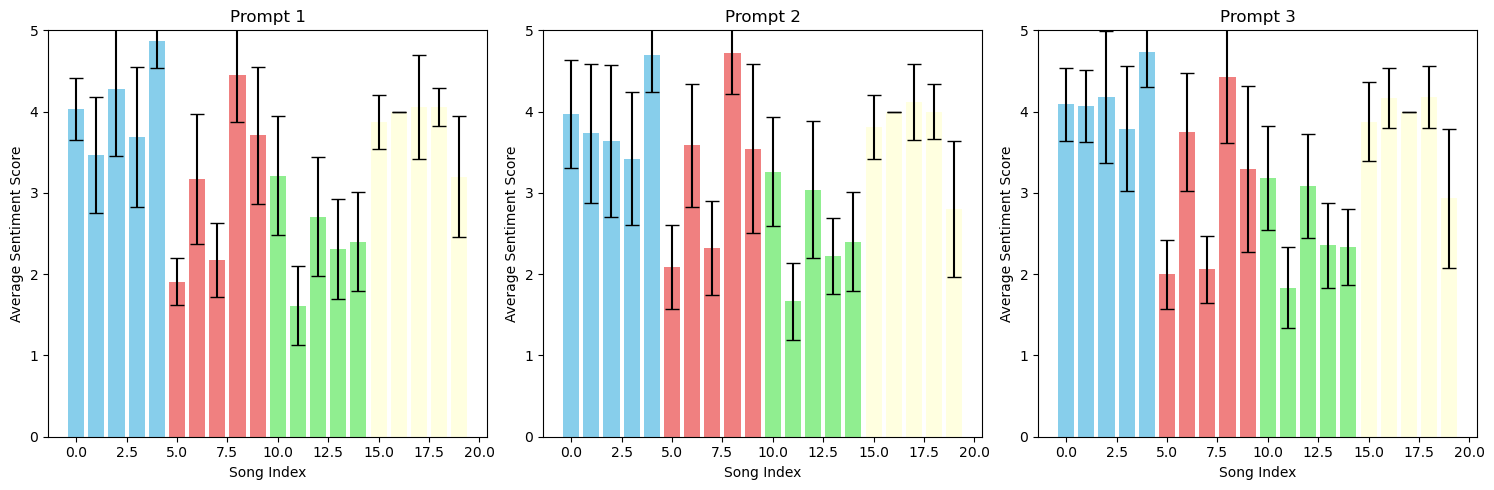

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
group_colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow']

# Compute and plot average similarity for each song, for each prompt
for prompt_id in range(1, 4):
    results_id = sentiments[sentiments['prompt_id'] == prompt_id]
    
    avg_sentiment_scores = []
    std_sentiment_scores = []
    song_names = results_id['song_name'].unique()
    
    for song_name in song_names:
        results_id_song = results_id[results_id['song_name'] == song_name]
        def can_convert_to_int(x):
            try:
                int(x)  # Attempt to convert the element to int
                return True
            except (ValueError, TypeError):
                return False
        
        # Filter array to keep only elements that can be converted to an integer
        sentiment_scores = np.array([x for x in results_id_song['sentiment_score'] if can_convert_to_int(x)]).astype(int)
        avg_sentiment_scores.append(np.mean(sentiment_scores))
        std_sentiment_scores.append(np.std(sentiment_scores))
    
    # Plot bar chart in the corresponding subplot
    ax = axes[prompt_id - 1]
    num_bars = len(avg_sentiment_scores)
    for i in range(num_bars):
        group_idx = (i // 5) % len(group_colors)  # Alternate colors for every 4 bars
        ax.bar(i, avg_sentiment_scores[i], yerr=std_sentiment_scores[i], capsize=5, 
               color=group_colors[group_idx])
    ax.set_title(f'Prompt {prompt_id}')
    ax.set_xlabel('Song Index')
    ax.set_ylabel('Average Sentiment Score')
    ax.set_ylim(0, 5)  # Assuming similarities range from 0 to 1

# Adjust layout and show plot
#fig.title('cosine similarities between DistilBERT embeddings of generated and original lyrics')
plt.tight_layout()
plt.show()